In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import neattext.functions as nfx
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.pipeline import Pipeline

In [2]:
emo_data = pd.read_csv('emotion.csv')
emo_data.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [3]:
#Data preparation
emo_data.columns

Index(['Unnamed: 0', 'Emotion', 'Text', 'Clean_Text'], dtype='object')

In [4]:
emo_data.drop(['Unnamed: 0', 'Clean_Text'], axis=1, inplace=True)

In [5]:
emo_data['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

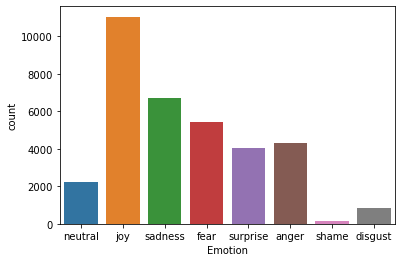

In [6]:
sns.countplot(x='Emotion', data=emo_data)

In [7]:
emo_data['Cleaned_text'] = emo_data['Text'].apply(nfx.remove_userhandles)
emo_data['Cleaned_text'] = emo_data['Text'].apply(nfx.remove_stopwords)

In [8]:
emo_data

,Emotion,Text,Cleaned_text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,@Iluvmiasantos ugh babe.. hugggzzz u .! babe n...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,@MichelGW gift! Hope like it! hand wear ! It'l...
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [9]:
# emo_data = emo_data.drop(['Unnamed: 0', 'Clean_Text'], axis=1)
# emo_data

In [10]:
#Extracting Features
X = emo_data['Cleaned_text']
y = emo_data['Emotion']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

In [12]:
#Building a pipeline
lr_pipeline = Pipeline(steps=[('cv', CountVectorizer()), ('log_reg', LogisticRegression())])

In [13]:
from sklearn import set_config
# Set config to diagram view
set_config(display='diagram')

# Plot the pipeline
lr_pipeline

Pipeline(steps=[('cv', CountVectorizer()), ('log_reg', LogisticRegression())])

In [14]:
#Fitting data to pipeline
lr_pipeline.fit(X_train, y_train)

C:\Users\Apin PC\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('log_reg', LogisticRegression())])

In [15]:
# Make predictions on test data
y_pred = lr_pipeline.predict(X_test)
y_pred

array(['surprise', 'surprise', 'sadness', ..., 'sadness', 'anger',
       'sadness'], dtype=object)

In [16]:
#Accuracy Check
lr_pipeline.score(y_test, y_pred)

0.6155393753592642

In [17]:
# Define naive bayes pipeline
nb_pipeline = Pipeline(steps=[('cv', CountVectorizer()), ('nb', MultinomialNB())])
nb_pipeline

Pipeline(steps=[('cv', CountVectorizer()), ('nb', MultinomialNB())])

In [18]:
#Fitting data to pipeline
nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('nb', MultinomialNB())])

In [19]:
# Make predictions on test data
y_pred = nb_pipeline.predict(X_test)
y_pred

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype='<U8')

In [20]:
#Accuracy Check
nb_pipeline.score(y_test, y_pred)

0.5739605288369419

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Define Dec Tree pipeline
dt_pipeline = Pipeline(steps=[('cv', CountVectorizer()), ('dt', DecisionTreeClassifier())])
dt_pipeline

Pipeline(steps=[('cv', CountVectorizer()), ('dt', DecisionTreeClassifier())])

In [22]:
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('dt', DecisionTreeClassifier())])

In [23]:
# Make predictions on test data
y_pred = dt_pipeline.predict(X_test)
y_pred

array(['surprise', 'anger', 'sadness', ..., 'sadness', 'anger', 'neutral'],
      dtype=object)

In [24]:
#Accuracy Check
dt_pipeline.score(y_test, y_pred)

0.5379383023567733

In [25]:
# from sklearn.ensemble import RandomForestClassifier

# # Define the pipeline
# rf_pipeline = Pipeline(steps=[('cv', CountVectorizer()), ('rf', RandomForestClassifier())])
# rf_pipeline.fit(X_train, y_train)

In [26]:
# y_pred = rf_pipeline.predict(X_test)
# y_pred

In [27]:
# #Accuracy Check
# rf_pipeline.score(y_test, y_pred)

In [28]:
example_text = 'I love eating shawarma'
lr_pipeline.predict([example_text])

array(['joy'], dtype=object)

In [33]:
lr_pipeline.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [34]:
lr_pipeline.predict_proba([example_text])

array([[0.04914994, 0.03826314, 0.05075943, 0.62497764, 0.04725812,
        0.12193871, 0.00142383, 0.0662292 ]])

In [29]:
nb_pipeline.predict([example_text])

array(['joy'], dtype='<U8')

In [30]:
dt_pipeline.predict([example_text]

array(['joy'], dtype=object)

In [36]:
import joblib
pipeline_ext = open("emotion_classifier_logistic_regression_pipeline_04_05_23.pkl", "wb")
joblib.dump(lr_pipeline, pipeline_ext)
pipeline_ext.close()

In [37]:
import streamlit

In [ ]:
!streamlit run app.py